## Journal used for the implemetation
**Journal title**: Boosting Breast Cancer Detection using Convolution Neural Network

**Authors**: Saad Awadh Alanazi ,M. Kamruzzaman ,Md Nazirul Islam Sarker, Madallah Alruwaili, Yousef Alhwaiti ,Nasser Alshammari and Muhammad Hameed Siddiqi

**Journal Name**: Boosting Breast Cancer Detection using Convolution Neural Network

**Year**: 2021

# 1. Import the required libraries

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import Convolution1D,MaxPool1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [ ]:
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2. Data Acquisition

For the problem identified by you, students have to find the data source themselves from any data source.

Provide the URL of the data used.

Write Code for converting the above downloaded data into a form suitable for DL



In [ ]:
##---------Type the code below this line------------------##
##-----------URL:- /kaggle/input/breast-cancer-wisconsin-diagnostic-dataset----------------------##
brca_data = pd.read_csv(r"brca.csv")
brca_data.head()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [ ]:
brca_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           569 non-null    int64  
 1   x.radius_mean        569 non-null    float64
 2   x.texture_mean       569 non-null    float64
 3   x.perimeter_mean     569 non-null    float64
 4   x.area_mean          569 non-null    float64
 5   x.smoothness_mean    569 non-null    float64
 6   x.compactness_mean   569 non-null    float64
 7   x.concavity_mean     569 non-null    float64
 8   x.concave_pts_mean   569 non-null    float64
 9   x.symmetry_mean      569 non-null    float64
 10  x.fractal_dim_mean   569 non-null    float64
 11  x.radius_se          569 non-null    float64
 12  x.texture_se         569 non-null    float64
 13  x.perimeter_se       569 non-null    float64
 14  x.area_se            569 non-null    float64
 15  x.smoothness_se      569 non-null    flo

In [ ]:
#Renaming the columns
brca_data.rename(columns = {"Unnamed: 0" : "unnamed",'x.radius_mean': 'radius_mean','x.texture_mean':'texture_mean',
                            'x.perimeter_mean':'perimeter_mean','x.area_mean':'area_mean','x.smoothness_mean':'smoothness_mean',
                            'x.compactness_mean':'compactness_mean','x.concavity_mean':'concavity_mean','x.concave_pts_mean':'concave_pts_mean',
                            'x.symmetry_mean':'symmetry_mean','x.fractal_dim_mean':'fractal_dim_mean','x.radius_se':'radius_se',
                            'x.texture_se':'texture_se','x.perimeter_se':'perimeter_se','x.area_se':'area_se','x.smoothness_se':'smoothness_se',
                            'x.compactness_se':'compactness_se','x.concavity_se':'concavity_se','x.concave_pts_se':'concave_pts_se',
                            'x.symmetry_se':'symmetry_se','x.fractal_dim_se':'fractal_dim_se','x.radius_worst':'radius_worst','x.texture_worst':'texture_worst',
                            'x.perimeter_worst':'perimeter_worst','x.area_worst':'area_worst','x.smoothness_worst':'smoothness_worst','x.compactness_worst':'compactness_worst',
                            'x.concavity_worst':'concavity_worst','x.concave_pts_worst':'concave_pts_worst','x.symmetry_worst':'symmetry_worst',
                            'x.fractal_dim_worst':'fractal_dim_worst'},inplace = True)



In [ ]:
brca_data.columns

Index(['unnamed', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_pts_mean', 'symmetry_mean', 'fractal_dim_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_pts_se', 'symmetry_se',
       'fractal_dim_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave_pts_worst', 'symmetry_worst',
       'fractal_dim_worst', 'y'],
      dtype='object')

In [ ]:
#removing the unnamed column
brca_data = brca_data.drop(columns='unnamed',axis = 1)

In [ ]:
brca_data.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_pts_mean', 'symmetry_mean', 'fractal_dim_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_pts_se', 'symmetry_se',
       'fractal_dim_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave_pts_worst', 'symmetry_worst',
       'fractal_dim_worst', 'y'],
      dtype='object')

In [ ]:
#Dropping duplicates and null values
brca_data =brca_data.drop_duplicates()
brca_data = brca_data.dropna()

In [ ]:
#Confirming inexistence of duplicates and null values
brca_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [ ]:
brca_data.isnull().sum()

radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
concave_pts_mean     0
symmetry_mean        0
fractal_dim_mean     0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
concave_pts_se       0
symmetry_se          0
fractal_dim_se       0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
concave_pts_worst    0
symmetry_worst       0
fractal_dim_worst    0
y                    0
dtype: int64

In [ ]:
brca_data['y'].value_counts()

B    357
M    212
Name: y, dtype: int64

In [ ]:
#Changing y values to numbers
brca_data['y'] = brca_data['y'].replace(['M','B'],[1,0])
brca_data['y'].value_counts()

0    357
1    212
Name: y, dtype: int64

In [ ]:
#Infilating the dataset to make it larger
#n_replicas = 50
#brca_data = pd.DataFrame(np.repeat(brca_data.values.astype(float),n_replicas,axis = 0),columns = brca_data.columns)
#brca_data.head()

In [ ]:
brca_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   radius_mean        569 non-null    float64
 1   texture_mean       569 non-null    float64
 2   perimeter_mean     569 non-null    float64
 3   area_mean          569 non-null    float64
 4   smoothness_mean    569 non-null    float64
 5   compactness_mean   569 non-null    float64
 6   concavity_mean     569 non-null    float64
 7   concave_pts_mean   569 non-null    float64
 8   symmetry_mean      569 non-null    float64
 9   fractal_dim_mean   569 non-null    float64
 10  radius_se          569 non-null    float64
 11  texture_se         569 non-null    float64
 12  perimeter_se       569 non-null    float64
 13  area_se            569 non-null    float64
 14  smoothness_se      569 non-null    float64
 15  compactness_se     569 non-null    float64
 16  concavity_se       569 non

In [ ]:
#shape
brca_data.shape

(569, 31)

In [ ]:
brca_data.groupby('y').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_pts_mean,symmetry_mean,fractal_dim_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_pts_worst,symmetry_worst,fractal_dim_worst
y,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


# 3. Data Preparation

Perform the data prepracessing that is required for the data that you have downloaded.


This stage depends on the dataset that is used.

In [ ]:
##---------Type the code below this line------------------##
##Separating the features and target
X = brca_data.drop(columns = 'y',axis=1)
Y = [int(x) for x in brca_data['y']]
Y = pd.Series(Y)
print(Y)


0      0
1      0
2      0
3      0
4      0
      ..
564    1
565    1
566    1
567    1
568    1
Length: 569, dtype: int64


In [ ]:
## Split the data into training set and testing set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20,stratify = Y,random_state=10)
print('X shape',X.shape,'X_train shape',X_train.shape,'X_test_shape',X_test.shape)


X shape (569, 30) X_train shape (455, 30) X_test_shape (114, 30)


In [ ]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## 4. Deep Neural Network Architecture


## 4.1 Design the architecture that you will be using

* CNN / RNN / Transformer as per the journal referenced



In [ ]:
##---------Type the code below this line------------------##
##---Buiding the Neural Network
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(3)

In [ ]:
epochs = 100
model = Sequential()
model.add(Convolution1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution1D(filters=64,kernel_size=2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_4 (Bat  (None, 29, 32)            128       
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 29, 32)            0         
                                                                 
 conv1d_5 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_5 (Bat  (None, 28, 64)            256       
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 28, 64)           

In [ ]:
##Model Compillation
model.compile(
    optimizer=Adam(learning_rate=0.00005),
    loss='binary_crossentropy',
    metrics=['accuracy']
             )

In [ ]:
# Print number of layers and units in each layer
print("Number of layers:", len(model.layers))
for i, layer in enumerate(model.layers):
    print(f"Layer {i+1}: {layer.__class__.__name__}, Units: {layer.output_shape}")


Number of layers: 10
Layer 1: Conv1D, Units: (None, 29, 32)
Layer 2: BatchNormalization, Units: (None, 29, 32)
Layer 3: Dropout, Units: (None, 29, 32)
Layer 4: Conv1D, Units: (None, 28, 64)
Layer 5: BatchNormalization, Units: (None, 28, 64)
Layer 6: Dropout, Units: (None, 28, 64)
Layer 7: Flatten, Units: (None, 1792)
Layer 8: Dense, Units: (None, 64)
Layer 9: Dropout, Units: (None, 64)
Layer 10: Dense, Units: (None, 1)


## 4.2 DNN Report

Report the following and provide justification for the same.

* Number of layers: **10**

Justification: The model consists of 10 layers in total, including convolutional, batch normalization, dropout, flatten, and dense layers.

* Number of units in each layer:
    
    **Conv1D(29, 32), BatchNormalization(29, 32), Dropout(29, 32), Conv1D(28, 64), BatchNormalization(28, 64), Dropout(28, 64), Flatten(1792), Dense(64), Dropout(64), Dense(1)**

Justification: Each layer is described with its type and the number of units or output shape. For convolutional layers, the shape of the output tensor is specified as (number of samples, number of time steps, number of features). For other layers like Flatten and Dense, only the number of units is provided.   

* Total number of trainable parameters: **119265**



In [ ]:
# Print number of layers
num_layers = len(model.layers)
print("Number of layers:", num_layers)

# Print number of units in each layer
num_units = [layer.units for layer in model.layers if isinstance(layer, Dense)]
print("Number of units in each layer:", num_units)

# Calculate total number of trainable parameters
total_params = model.count_params()
print("Total number of trainable parameters:", total_params)

Number of layers: 10
Number of units in each layer: [64, 1]
Total number of trainable parameters: 119457


# 5. Training the model


In [ ]:
# Configure the training, by using appropriate optimizers, regularizations and loss functions
##---------Type the code below this line------------------##
##Training the Neural Network

history =model.fit(X_train,Y_train,validation_split= 0.1,epochs =100)


Epoch 1/100
13/13 [==============================] - 2s 27ms/step - loss: 1.2363 - accuracy: 0.5257 - val_loss: 0.6531 - val_accuracy: 0.6739
Epoch 2/100
13/13 [==============================] - 0s 11ms/step - loss: 0.8433 - accuracy: 0.6186 - val_loss: 0.6162 - val_accuracy: 0.8696
Epoch 3/100
13/13 [==============================] - 0s 11ms/step - loss: 0.6868 - accuracy: 0.7115 - val_loss: 0.5766 - val_accuracy: 0.9565
Epoch 4/100
13/13 [==============================] - 0s 11ms/step - loss: 0.6090 - accuracy: 0.7482 - val_loss: 0.5389 - val_accuracy: 0.9783
Epoch 5/100
13/13 [==============================] - 0s 10ms/step - loss: 0.5521 - accuracy: 0.7751 - val_loss: 0.5010 - val_accuracy: 0.9783
Epoch 6/100
13/13 [==============================] - 0s 11ms/step - loss: 0.4359 - accuracy: 0.8068 - val_loss: 0.4655 - val_accuracy: 0.9565
Epoch 7/100
13/13 [==============================] - 0s 12ms/step - loss: 0.4414 - accuracy: 0.8264 - val_loss: 0.4314 - val_accuracy: 0.9348
Epoch 

In [ ]:
import matplotlib.pyplot as plt
def plot_learningCurve(history,epoch):
    #plot training & validation accuracy values
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc = 'upper left')
    plt.show()

    #plot training & validation loss values
    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc = 'upper left')
    plt.show()

In [ ]:
history.history

{'loss': [1.2362765073776245,
  0.8433330655097961,
  0.6867660284042358,
  0.609031081199646,
  0.5520765781402588,
  0.4359065592288971,
  0.44144266843795776,
  0.40604788064956665,
  0.3855583071708679,
  0.319812536239624,
  0.25632938742637634,
  0.28825682401657104,
  0.2676267623901367,
  0.256876140832901,
  0.23926855623722076,
  0.23419909179210663,
  0.2294720858335495,
  0.2226758897304535,
  0.17371441423892975,
  0.1745084971189499,
  0.2785167098045349,
  0.1770794540643692,
  0.20840655267238617,
  0.17844459414482117,
  0.19580477476119995,
  0.20226216316223145,
  0.14685626327991486,
  0.16864004731178284,
  0.1744210422039032,
  0.1698862612247467,
  0.1858326643705368,
  0.16111072897911072,
  0.17379292845726013,
  0.16408219933509827,
  0.14019061625003815,
  0.14347431063652039,
  0.15087652206420898,
  0.15671199560165405,
  0.12533003091812134,
  0.13838620483875275,
  0.1158856600522995,
  0.11334149539470673,
  0.1442229151725769,
  0.11233336478471756,
  0

# 6. Test the model


In [ ]:
##---------Type the code below this line------------------##
##Accuracy of the model on test data
prediction_test_data = model.predict(X_test)
print(prediction_test_data.shape)
print(prediction_test_data[0])

print(prediction_test_data)

4/4 [==============================] - 0s 4ms/step
(114, 1)
[0.99999326]
[[9.99993265e-01]
 [8.47553134e-01]
 [5.35465539e-01]
 [9.84533429e-01]
 [5.30058797e-03]
 [2.00816570e-03]
 [2.71593948e-04]
 [9.99978960e-01]
 [3.11480695e-03]
 [1.00000000e+00]
 [9.95590210e-01]
 [9.96389031e-01]
 [3.52301686e-05]
 [1.15427953e-04]
 [7.40254691e-05]
 [9.99970675e-01]
 [5.01827300e-02]
 [1.77248381e-02]
 [1.72432105e-03]
 [9.66256578e-03]
 [9.77813244e-01]
 [1.00000000e+00]
 [3.92168004e-05]
 [9.98148918e-01]
 [5.58406100e-06]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.01703949e-06]
 [9.99957263e-01]
 [1.04719082e-04]
 [1.71853993e-02]
 [4.43644375e-02]
 [1.41798882e-04]
 [4.09868017e-06]
 [8.45469892e-01]
 [9.99976277e-01]
 [9.99581397e-01]
 [1.36037800e-03]
 [9.83640611e-01]
 [9.99999762e-01]
 [1.33964102e-04]
 [2.70681735e-03]
 [9.98986065e-01]
 [3.02621326e-03]
 [9.99999523e-01]
 [6.97441737e-06]
 [4.06311010e-05]
 [6.74984371e-03]
 [9.98280287e-01]
 [1.11047842e-03]
 [3.41780

In [ ]:
#Model Evaluation(model.predict() gives prediction probability of each class for that data point unlike ml algorithms that would give direct prediction eg. as either 0 or 1)
loss,accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

4/4 [==============================] - 0s 5ms/step - loss: 0.0376 - accuracy: 0.9825
0.9824561476707458


# 7. Report the result

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


Plot 1: **Training and validation accuracy history**

Plot 2: **Plot the training and validation loss history.**


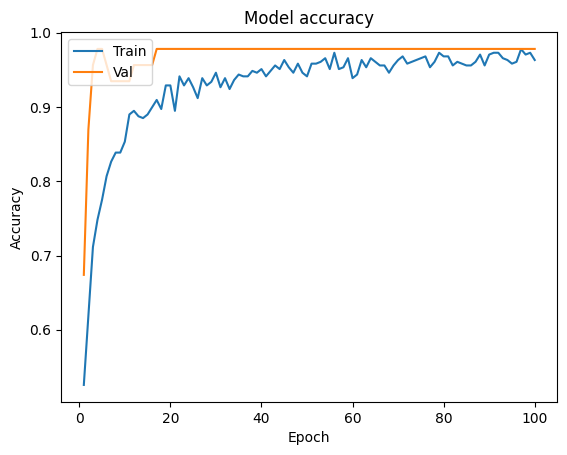

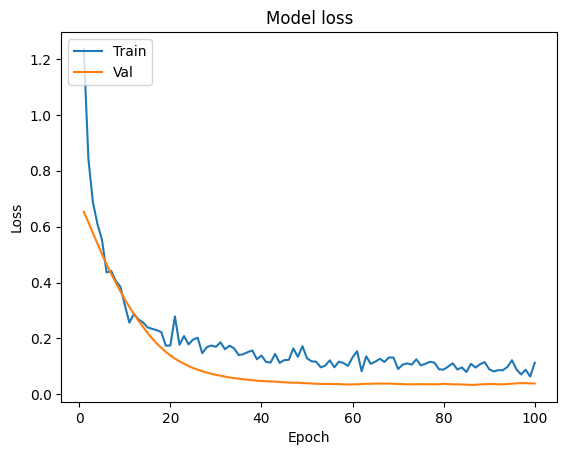

In [ ]:
##---------Type the code below this line------------------##
plot_learningCurve(history,epochs)

3. **Report the testing accuracy and loss.**

In [ ]:
# Evaluate the model on the testing set
test_loss, test_acc = model.evaluate(X_test, Y_test)

# Print the testing accuracy and loss
print(f"Testing Accuracy: {test_acc:.4f}")
print(f"Testing Loss: {test_loss:.4f}")

4/4 [==============================] - 0s 5ms/step - loss: 0.0376 - accuracy: 0.9825
Testing Accuracy: 0.9825
Testing Loss: 0.0376


4/4 [==============================] - 0s 5ms/step
Confusion Matrix:
[[70  2]
 [ 0 42]]


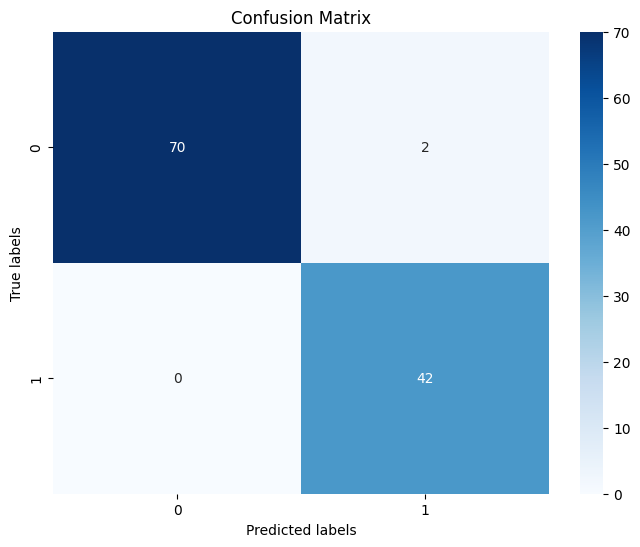

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have a trained model (`model`), testing data (`X_test`, `y_test`),
# and predicted labels (`y_pred`) from the model on the testing data

# Predict labels on testing data (if not already done)
y_pred = model.predict(X_test).round()  # Or use predict() for probability scores

# Generate confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

4. **Show Confusion Matrix for testing dataset.**

In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        72
           1       0.95      1.00      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



5. **Report values for preformance study metrics like accuracy, precision, recall, F1 Score.**

In [ ]:
#Compute performance metrics
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9824561403508771
Precision: 0.9545454545454546
Recall: 1.0
F1 Score: 0.9767441860465117


### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck